In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

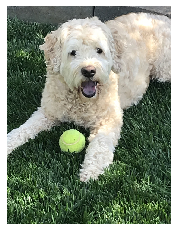

In [17]:
A = imread('Sunny.jpeg')
img = plt.imshow(A)
plt.axis('off');

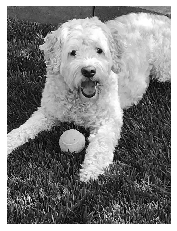

In [38]:
X = np.mean(A, -1) # convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.savefig('pics/sunny_grayscale.png');

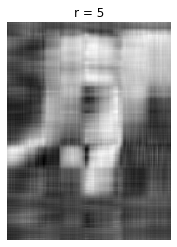

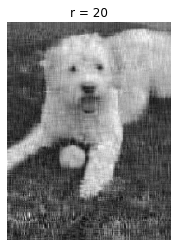

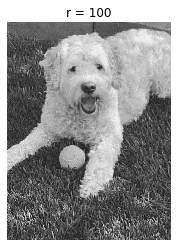

In [39]:
# use SVD to compress image and test various rank r values and effect on image

U, S, VT = np.linalg.svd(X, full_matrices=False)  # use economy matrix
S = np.diag(S)

j=0
for r in (5, 20, 100):
    # construct approximate image
    # vary rank r
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.savefig(f'pics/sunny_grayscale{str(r)}.png');

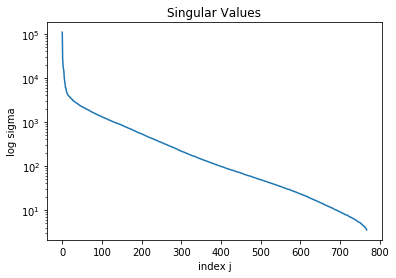

In [40]:
# plot the singular values

plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.ylabel('log sigma')
plt.xlabel('index j')
plt.savefig('pics/singular_values.png');

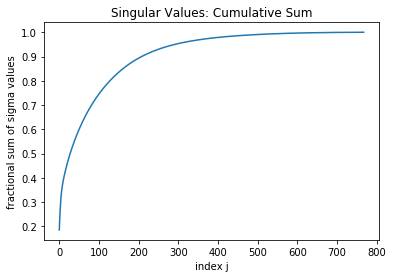

In [41]:
# plot cumulative sum of singular values

# shows fraction of energy captured by first r modes
plt.plot(np.cumsum(np.diag(S))/np.sum((np.diag(S))))
plt.title('Singular Values: Cumulative Sum')
plt.ylabel('fractional sum of sigma values')
plt.xlabel('index j')
plt.savefig('pics/cum_sum.png');